In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from torchvision import datasets, transforms

# transform -> normalise data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = datasets.MNIST("../Data/" ,download=False, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

In [3]:
data_iter = iter(train_loader)
data_iter

In [4]:
# from first batch
images, labels = data_iter.next()
print("Images : ", type(images))
print("Image shape : ", images.shape)
print("Label shape : ", labels.shape)

Images :  <class 'torch.Tensor'>
Image shape :  torch.Size([64, 1, 28, 28])
Label shape :  torch.Size([64])


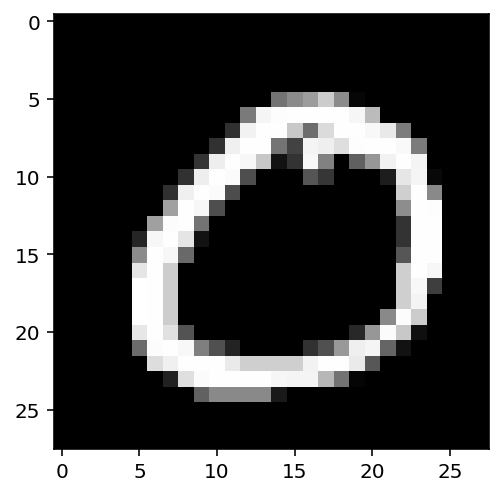

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap="Greys_r")

In [6]:
def sigmoid_act(x):
    return 1 / (1 + torch.exp(-x))

# flatten the images from 28x28 to 784
# either insert -1 or 784
inputs = images.view(images.shape[0], -1)

# params
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

In [7]:
h = sigmoid_act(torch.mm(inputs, w1) + b1)
print("Hidden : ", h.shape)
out = torch.mm(h, w2) + b2
print("Output : ", out.shape)

Hidden :  torch.Size([64, 256])
Output :  torch.Size([64, 10])


In [8]:
# defining softmax function
def softmax(x):
    """dim 0 calculates row-wise and dim 1 calculates column-wise"""
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

# softmax functon range - [0, 1]
prob = softmax(out)
print("Output shape : ", prob.shape)
print("Probabilities (column summed up) : \n", prob.sum(dim=1))

Output shape :  torch.Size([64, 10])
Probabilities (column summed up) : 
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [9]:
# neural network using nn
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # output layer
        self.output = nn.Linear(256, 10)
        
        # sigmoid and softmax function
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [10]:
# neural network using nn functional
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
    
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        return x

In [11]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [12]:
"""
Create a network: 
Input units : 784
Hidden layer units : 128 (ReLU activation)
Hidden layer units : 64 (ReLU activation)
Output layerunits : 10 (Softmax activation)
"""

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def Forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [13]:
model.fc1.weight

Parameter containing:
tensor([[ 0.0081, -0.0121, -0.0051,  ..., -0.0115,  0.0011,  0.0077],
        [ 0.0269,  0.0267,  0.0154,  ..., -0.0099, -0.0263,  0.0289],
        [-0.0326, -0.0255, -0.0048,  ..., -0.0005, -0.0138, -0.0064],
        ...,
        [ 0.0227, -0.0150, -0.0342,  ..., -0.0025,  0.0086, -0.0264],
        [ 0.0056, -0.0236, -0.0071,  ...,  0.0060,  0.0300, -0.0129],
        [ 0.0201,  0.0185, -0.0103,  ..., -0.0030,  0.0129,  0.0082]],
       requires_grad=True)

In [14]:
model.fc1.bias

Parameter containing:
tensor([ 0.0302,  0.0069,  0.0119,  0.0152,  0.0265, -0.0215, -0.0112,  0.0246,
        -0.0110,  0.0301, -0.0304, -0.0023, -0.0069, -0.0329,  0.0319,  0.0116,
         0.0009,  0.0139, -0.0199,  0.0175,  0.0298,  0.0041,  0.0286, -0.0284,
        -0.0346,  0.0046,  0.0207, -0.0190,  0.0179, -0.0224, -0.0319,  0.0355,
        -0.0115, -0.0082,  0.0176, -0.0138,  0.0232,  0.0280,  0.0149, -0.0305,
         0.0172,  0.0207, -0.0305,  0.0094, -0.0151,  0.0188,  0.0097,  0.0029,
        -0.0067,  0.0120, -0.0352, -0.0220, -0.0249,  0.0291, -0.0042,  0.0109,
        -0.0229,  0.0139, -0.0334,  0.0256,  0.0351, -0.0061, -0.0177,  0.0281,
         0.0357, -0.0143, -0.0082,  0.0197,  0.0323, -0.0311, -0.0090,  0.0175,
         0.0014,  0.0127,  0.0048,  0.0073,  0.0294, -0.0099,  0.0296,  0.0111,
         0.0229, -0.0309,  0.0195,  0.0182, -0.0073, -0.0018,  0.0226, -0.0203,
         0.0070, -0.0326, -0.0209,  0.0333,  0.0070, -0.0149,  0.0117,  0.0184,
        -0.0172,  

In [15]:
model.fc1.weight.data.fill_(0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [16]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0035, -0.0075, -0.0124,  ..., -0.0014,  0.0014,  0.0005],
        [-0.0026,  0.0113, -0.0083,  ..., -0.0069,  0.0063,  0.0053],
        [ 0.0167, -0.0051,  0.0031,  ..., -0.0008, -0.0105,  0.0048],
        ...,
        [-0.0059, -0.0141, -0.0108,  ..., -0.0227, -0.0135,  0.0008],
        [-0.0004, -0.0032,  0.0094,  ...,  0.0079,  0.0137, -0.0075],
        [-0.0082, -0.0081, -0.0022,  ..., -0.0114, -0.0085,  0.0143]])

In [17]:
def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

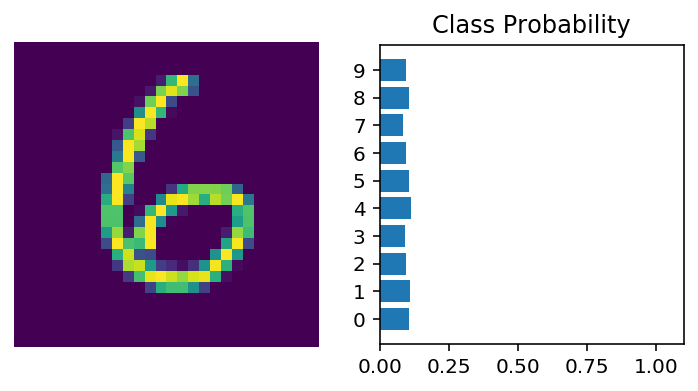

In [18]:
# collect data
data_iter = iter(train_loader)
images, labels = data_iter.next()

# resize images into 1D vector
# images.resize_(batch_size, color_channel, image_pixels)
images.resize_(64, 1, 784)

# forward pass through the network
img_idx = 0
ps = model.Forward(images[img_idx, :])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


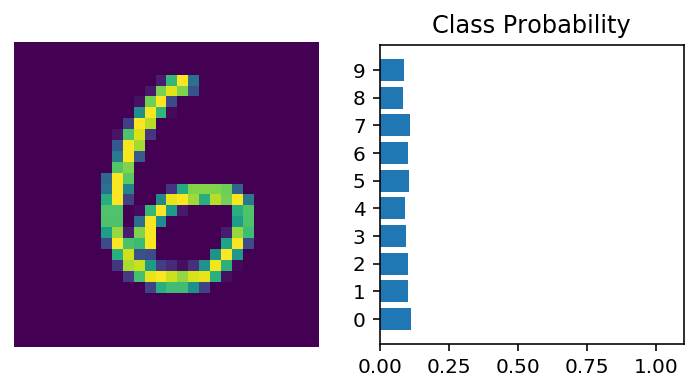

In [19]:
# using nn.Sequential

# hyperparams for network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))

print(model)

ps = model.forward(images[0, :])
view_classify(images[0].view(1, 28, 28), ps)

In [20]:
model[0].weight

Parameter containing:
tensor([[-0.0125,  0.0019, -0.0195,  ...,  0.0304,  0.0287, -0.0131],
        [-0.0223, -0.0233,  0.0137,  ..., -0.0216,  0.0188, -0.0056],
        [-0.0039, -0.0119,  0.0302,  ..., -0.0134,  0.0180,  0.0200],
        ...,
        [ 0.0251, -0.0348, -0.0326,  ...,  0.0172,  0.0351, -0.0324],
        [-0.0268, -0.0226,  0.0326,  ..., -0.0144,  0.0265, -0.0111],
        [-0.0303, -0.0255,  0.0270,  ..., -0.0167,  0.0061,  0.0355]],
       requires_grad=True)

In [21]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

model.fc1.weight

Parameter containing:
tensor([[-0.0084,  0.0201, -0.0116,  ..., -0.0280, -0.0314,  0.0197],
        [ 0.0111,  0.0165, -0.0097,  ...,  0.0072, -0.0232, -0.0087],
        [ 0.0089, -0.0252, -0.0139,  ..., -0.0201, -0.0120,  0.0180],
        ...,
        [ 0.0037,  0.0190, -0.0293,  ..., -0.0346, -0.0044,  0.0104],
        [ 0.0252,  0.0250,  0.0237,  ...,  0.0008, -0.0191,  0.0028],
        [ 0.0140,  0.0002, -0.0204,  ...,  0.0252, -0.0342, -0.0086]],
       requires_grad=True)